## Result Visualization ##

In this part of the project we will visualize concrete examples from action values given by our model and evaluate the capabilities and limitations of our model.

First we load the data from the previous step. If you have not already you should run the file 2_Training_Model.ipynb to retrieve the data and save it to a file.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np

df_model = pd.read_pickle("data/data_cleaned_trained.pkl")

Once the data is loading we can start with the visualization, we use this function to plot game states and action sequences.

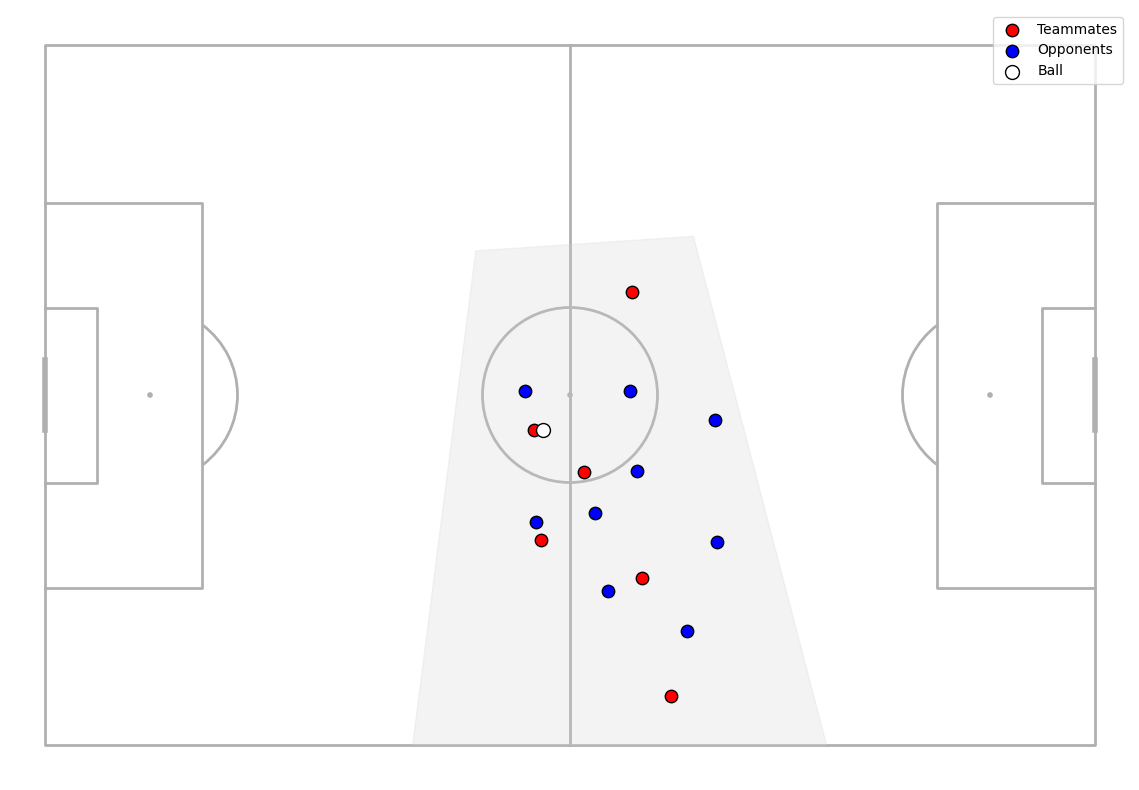

In [50]:
def plot_event_with_360(event_row, show_event_location=True):
    p = Pitch(pitch_type='statsbomb')
    fig, ax = p.draw(figsize=(12, 8))

    if isinstance(event_row['visible_area'], list) and len(event_row['visible_area']) >= 2:
        visible_area = np.array(event_row['visible_area']).reshape(-1, 2)
        p.polygon([visible_area], color='lightgray', alpha=0.25, ax=ax)

        if isinstance(event_row['freeze_frame'], list) and len(event_row['freeze_frame']) > 0:
            freeze_frame_df = pd.DataFrame(event_row['freeze_frame'])

            teammate_locs = freeze_frame_df[freeze_frame_df['teammate']]
            opponent_locs = freeze_frame_df[~freeze_frame_df['teammate']]

            p.scatter(teammate_locs['x'], teammate_locs['y'],
                      c='red', s=80, ec='k', ax=ax, label='Teammates')
            p.scatter(opponent_locs['x'], opponent_locs['y'],
                      c='blue', s=80, ec='k', ax=ax, label='Opponents')
    else:
        print("No visible_area available; only plotting event location.")

    if show_event_location and ('x' in event_row and 'y' in event_row):
        if pd.notna(event_row['x']) and pd.notna(event_row['y']):
            p.scatter(event_row['x'] + 1, event_row['y'],
                      c='white', s=100, ax=ax, ec='k', label='Ball')

            label_text = event_row.get('type_name', 'Event')
            if pd.notna(event_row.get('sub_type_name')):
                label_text += f" ({event_row['sub_type_name']})"

    ax.legend()
    plt.show()

idx = 10015

event_row = df_model.iloc[idx]

plot_event_with_360(event_row)